# From: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html

In [1]:
%matplotlib notebook


# Visualization of MLP weights on MNIST


Sometimes looking at the learned coefficients of a neural network can provide
insight into the learning behavior. For example if weights look unstructured,
maybe some were not used at all, or if very large coefficients exist, maybe
regularization was too low or the learning rate too high.

This example shows how to plot some of the first layer weights in a
MLPClassifier trained on the MNIST dataset.

The input data consists of 28x28 pixel handwritten digits, leading to 784
features in the dataset. Therefore the first layer weight matrix have the shape
(784, hidden_layer_sizes[0]).  We can therefore visualize a single column of
the weight matrix as a 28x28 pixel image.

To make the example run faster, we use very few hidden units, and train only
for a very short time. Training longer would result in weights with a much
smoother spatial appearance.


In [2]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")


Automatically created module for IPython interactive environment


In [3]:
import numpy as np
# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


In [4]:
mnist.data.shape

(70000, 784)

In [5]:
max_size=min(1000, mnist.data.shape[0])
ind = np.arange(mnist.data.shape[0])
np.random.shuffle(ind)

mnist_data = mnist.data[ ind[:max_size]]
mnist_target = mnist.target[ ind[:max_size]]


In [6]:
# rescale the data, use the traditional train/test split
X, y = mnist_data / 255., mnist_target

num_train = int(max_size * .80)
X_train, X_test = X[:num_train], X[num_train:]
y_train, y_test = y[:num_train], y[num_train:]

In [7]:
X_train.shape

(800, 784)

In [8]:
hidden_layer_0_size = 30

In [9]:
# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer_0_size), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 2.23202550
Iteration 2, loss = 1.55188144
Iteration 3, loss = 0.89206230
Iteration 4, loss = 0.53530351
Iteration 5, loss = 0.39103162
Iteration 6, loss = 0.31356779
Iteration 7, loss = 0.24798010
Iteration 8, loss = 0.22331864
Iteration 9, loss = 0.17706154
Iteration 10, loss = 0.14129820
Iteration 11, loss = 0.11834967
Iteration 12, loss = 0.10474716
Iteration 13, loss = 0.08882877
Iteration 14, loss = 0.07193777
Iteration 15, loss = 0.05915885
Iteration 16, loss = 0.05172657
Iteration 17, loss = 0.04486447
Iteration 18, loss = 0.04108610
Iteration 19, loss = 0.03771171
Iteration 20, loss = 0.03342616
Iteration 21, loss = 0.03058558
Iteration 22, loss = 0.02747203
Iteration 23, loss = 0.02566296
Iteration 24, loss = 0.02383220
Iteration 25, loss = 0.02238708
Iteration 26, loss = 0.02086146
Iteration 27, loss = 0.01954239
Iteration 28, loss = 0.01858949
Iteration 29, loss = 0.01767543
Iteration 30, loss = 0.01683900
Iteration 31, loss = 0.01569241
Iteration 32, los

/opt/conda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [10]:
len(mlp.coefs_)

2

In [11]:
mlp.coefs_[0].T.shape

(30, 784)

<IPython.core.display.Javascript object>


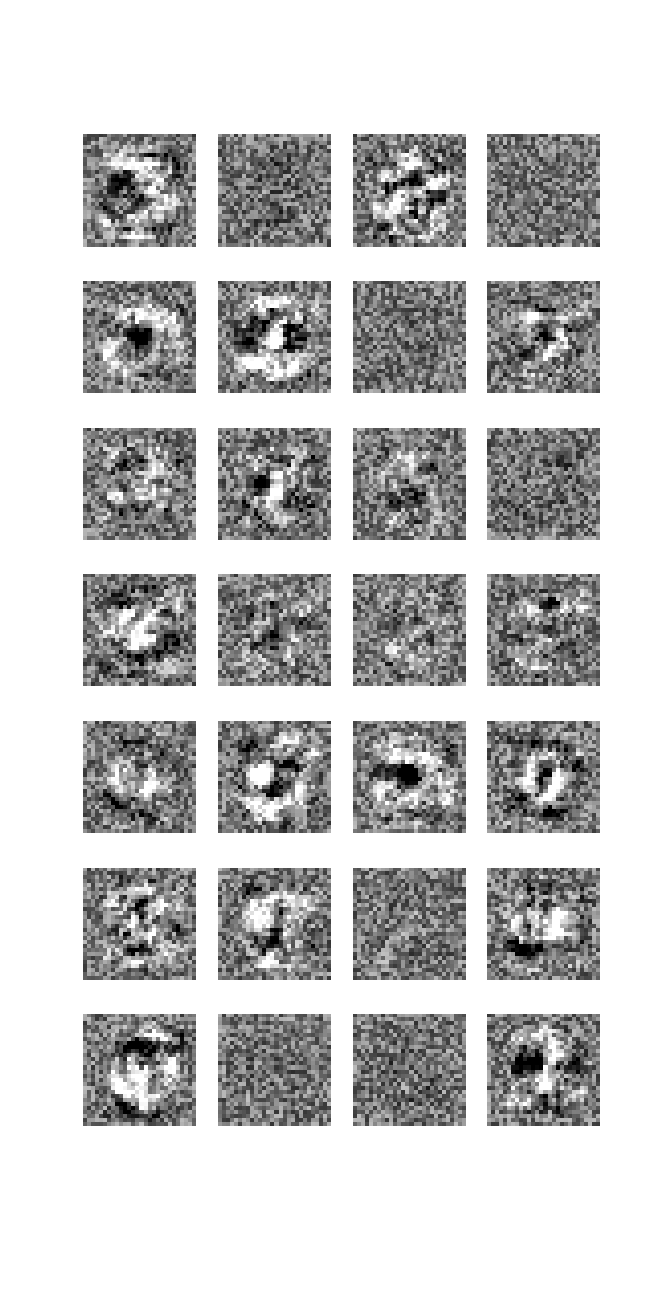

In [12]:
fig, axes = plt.subplots(int(hidden_layer_0_size/4), 4, figsize=(10,20))

# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.35 * vmin,
               vmax=.35 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()